<a href="https://colab.research.google.com/github/soorajpu12/LSTproject/blob/master/TOA_Brightness_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parts taken from- https://geohackweek.github.io/raster/04-workingwithrasters/

In [1]:
pip install rasterio

In [2]:
pip install pyproj

In [3]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 13)

Populating the interactive namespace from numpy and matplotlib


**NDVI** FOR A SCENE



In [5]:
# Image- lake Urmia, Iran
date = '2020-05-17'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20200517_20200527_01_T1/'
redband = 'LC08_L1TP_169034_20200517_20200527_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_169034_20200517_20200527_01_T1_B{}.TIF'.format(5)

Decimation factor= 9


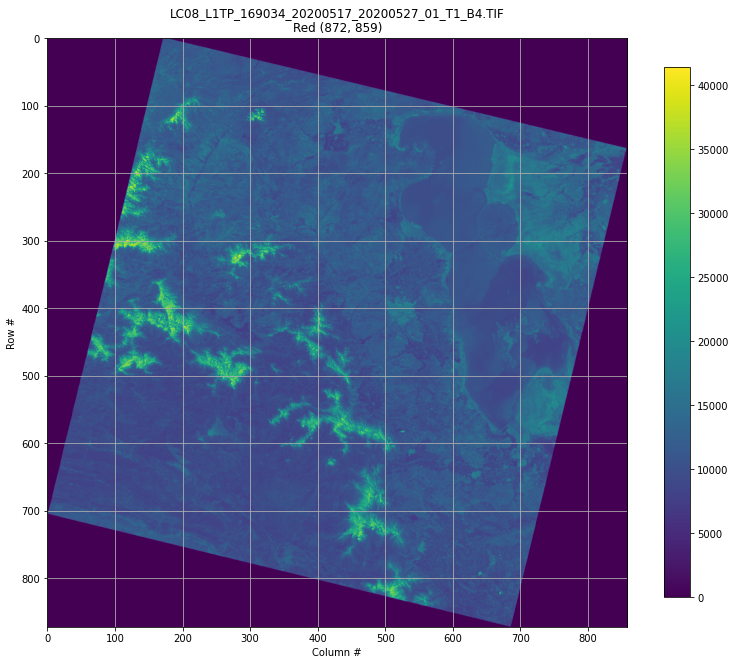

In [6]:
with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar(shrink=0.75)
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

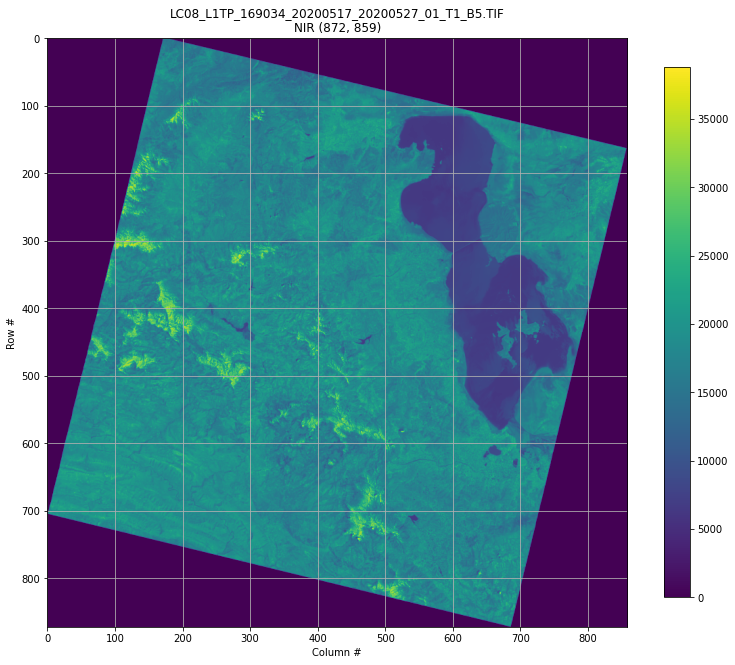

In [7]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(nir)
plt.colorbar(shrink=0.75)
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


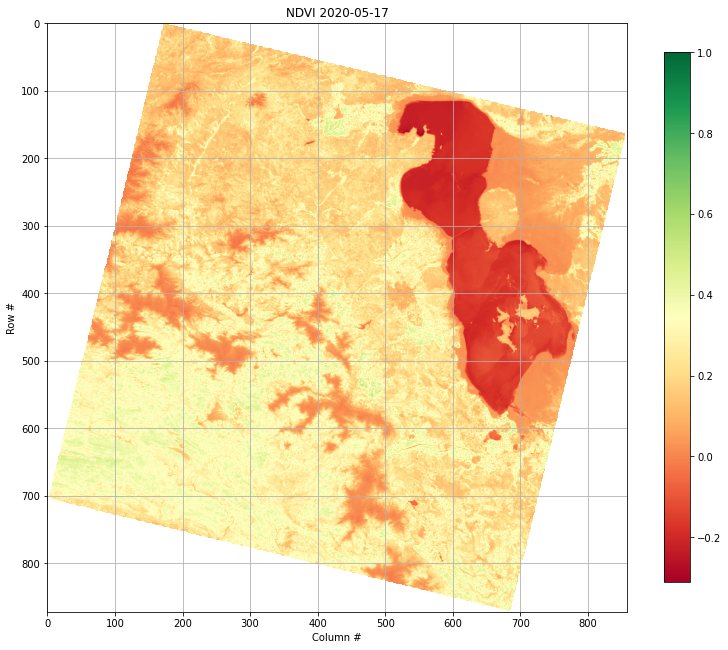

In [8]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nir,red)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(shrink=0.75)
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

**COMPARING** MANY NDVI

Opening: http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20170525_20170614_01_T1/LC08_L1TP_169034_20170525_20170614_01_T1_B4.TIF
Decimation factor= 9
Opening: http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20170525_20170614_01_T1/LC08_L1TP_169034_20170525_20170614_01_T1_B5.TIF
Decimation factor= 9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


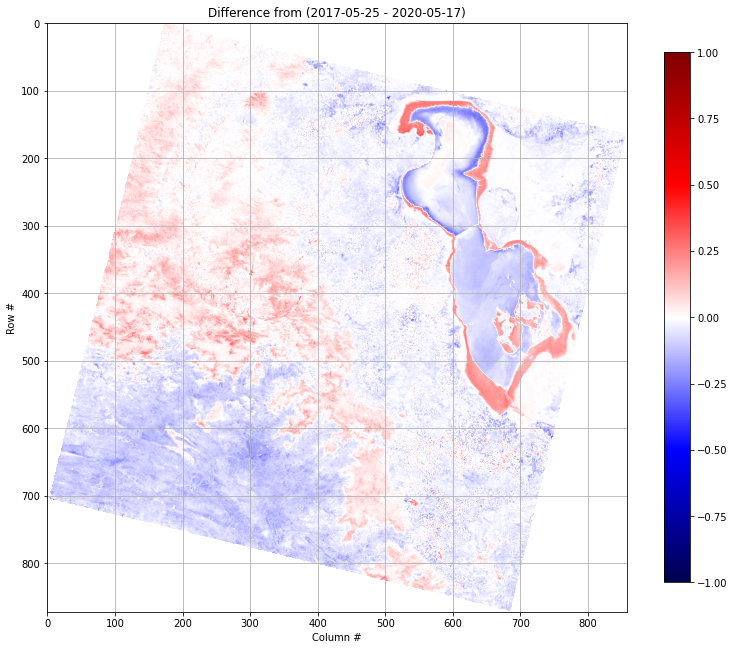

In [9]:
# Use the same example image:
date2 = '2017-05-25'
#url2 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20180619_20180703_01_T1/'
url2 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20170525_20170614_01_T1/'
#redband2 = 'LC08_L1TP_042034_20180619_20180703_01_T1_B{}.TIF'.format(4)
#nirband2 = 'LC08_L1TP_042034_20180619_20180703_01_T1_B{}.TIF'.format(5)
redband2 = 'LC08_L1TP_169034_20170525_20170614_01_T1_B{}.TIF'.format(4)
nirband2 = 'LC08_L1TP_169034_20170525_20170614_01_T1_B{}.TIF'.format(5)

filepath = url2+redband2
with rasterio.open(filepath) as src:
    print('Opening:', filepath)
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red2 = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

filepath = url2+nirband2
with rasterio.open(filepath) as src:
    print('Opening:', filepath)
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    nir2 = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

ndvi2 = calc_ndvi(nir2, red2)

#####################################################################################################################################################

#fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)
#fig, axes = plt.subplots(1,3, sharex=True, sharey=True)

#plt.sca(axes[0])
#plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
#plt.colorbar(shrink=0.25)
#plt.title('NDVI {}'.format(date))
#plt.xlabel('Column #')
#plt.ylabel('Row #')

#plt.sca(axes[1])
#plt.imshow(ndvi2, cmap='RdYlGn', vmin=-1, vmax=1)
#plt.colorbar(shrink=0.25)
#plt.title('NDVI {}'.format(date2))

#plt.sca(axes[2])
plt.imshow(ndvi2 - ndvi, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(shrink=0.75)
plt.title('Difference from ({} - {})'.format(date2, date))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

**NDWI** FOR A SCENE

In [10]:
# Image- lake Urmia, Iran
date = '2020-05-17'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20200517_20200527_01_T1/'
Gband = 'LC08_L1TP_169034_20200517_20200527_01_T1_B{}.TIF'.format(3)
nirband = 'LC08_L1TP_169034_20200517_20200527_01_T1_B{}.TIF'.format(5)

Decimation factor= 9


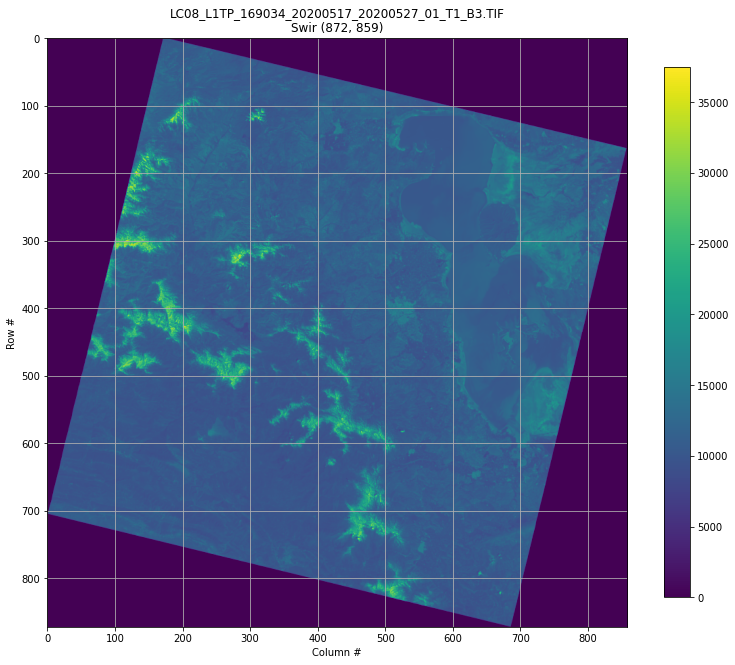

In [11]:
with rasterio.open(url+Gband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    G = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(G)
plt.colorbar(shrink=0.75)
plt.title('{}\nSwir {}'.format(Gband, G.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

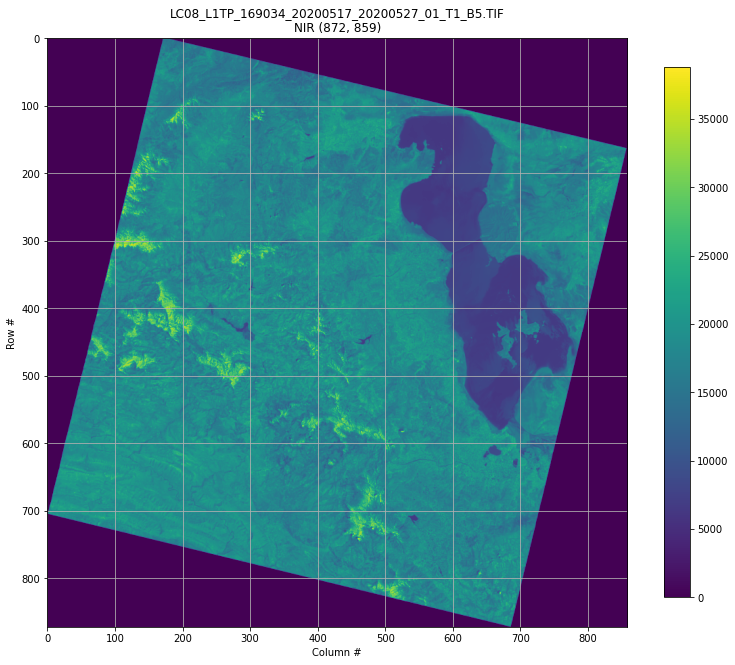

In [12]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(nir)
plt.colorbar(shrink=0.75)
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


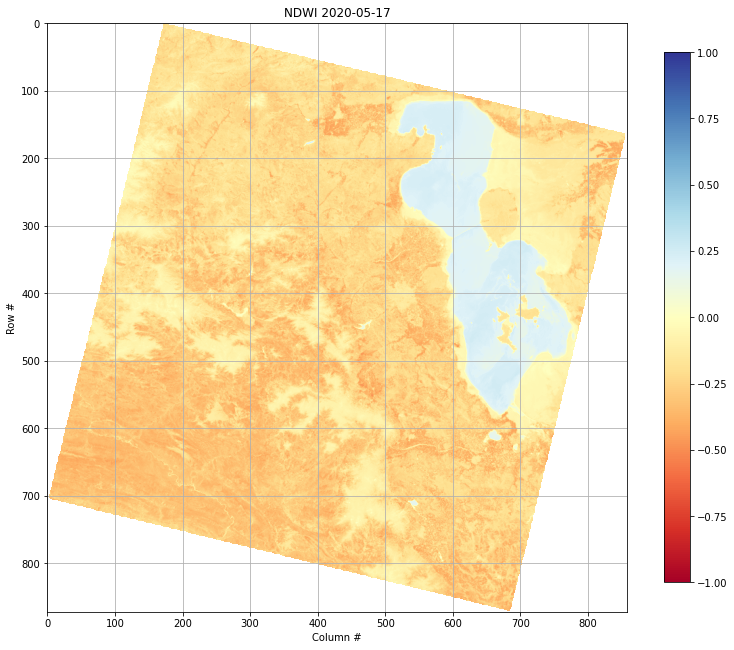

In [13]:
def calc_ndwi(nir,G):
    '''Calculate NDWI from integer arrays'''
    nir = nir.astype('f4')
    G = G.astype('f4')
    ndwi = (G - nir) / (nir + G)
    return ndwi

ndwi = calc_ndwi(nir,G)
plt.imshow(ndwi, cmap='RdYlBu')
plt.colorbar(shrink=0.75)
plt.title('NDWI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

**BRIGHTNESS TEMPERATURE**

In [14]:
def DN_to_BrightnessTemp(image, M , A , k1, k2):     
    
    TOA_radiance = np.zeros(image.shape)
    brightness_temp = np.zeros(image.shape)        
    TOA_radiance = (M * image) + A
    # The minus 273.15 below is so as to obtain the result in degree celcius
    brightness_temp = (k2 / (np.log((k1 / TOA_radiance) + 1))) - 273.15
    return brightness_temp

OLI and TIRS band data can be converted to TOA Spectral Radiance using Radiance rescaling factors in the metadata file

Decimation factor= 9


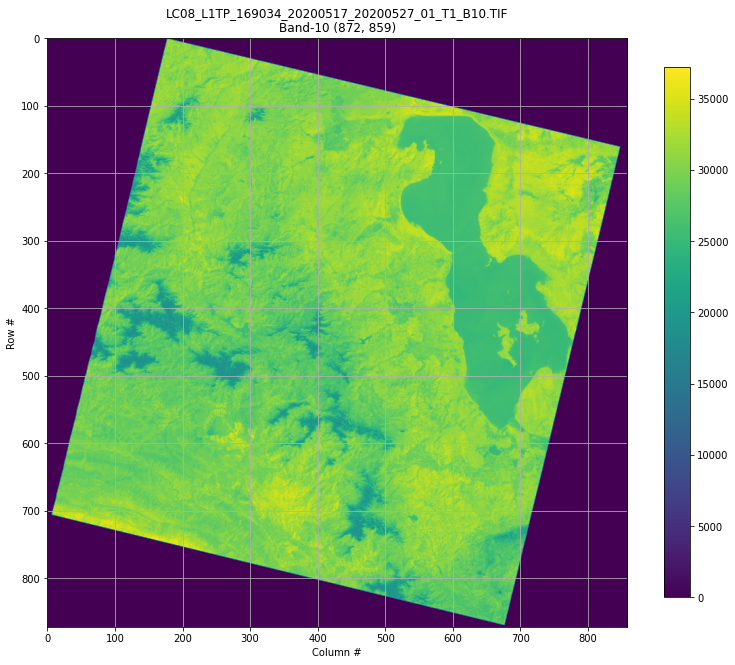

In [15]:
# Upload band 10 to get brightness temperature
date = '2020-05-17'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20200517_20200527_01_T1/'
dn_band = 'LC08_L1TP_169034_20200517_20200527_01_T1_B{}.TIF'.format(10)

with rasterio.open(url+dn_band) as src1:
    profile = src1.profile
    oviews = src1.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    dnn = src1.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(dnn)
plt.colorbar(shrink=0.75)
plt.title('{}\nBand-10 {}'.format(dn_band, dnn.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()

[TXT FILE URL](http://landsat-pds.s3.amazonaws.com/c1/L8/169/034/LC08_L1TP_169034_20200517_20200527_01_T1/LC08_L1TP_169034_20200517_20200527_01_T1_MTL.txt)


    # M = Band-specific multiplicative rescaling factor from the image folder metadata (RADIANCE_MULT_BAND_x, where x is the band number).
    # A = Band-specific additive rescaling factor from the image folder metadata (RADIANCE_ADD_BAND_x, where x is the band number).
    # k1 = Band-specific thermal conversion constant from the image folder metadata (K1_CONSTANT_BAND_x, where x is the thermal band number)
    # k2 = Band-specific thermal conversion constant from the image folder metadata (K2_CONSTANT_BAND_x, where x is the thermal band number

In [16]:
# Iput values manually from MTL.txt file
image = dnn
M = 3.3420E-04
A = 0.10000
k1 = 774.8853 
k2 = 1321.0789

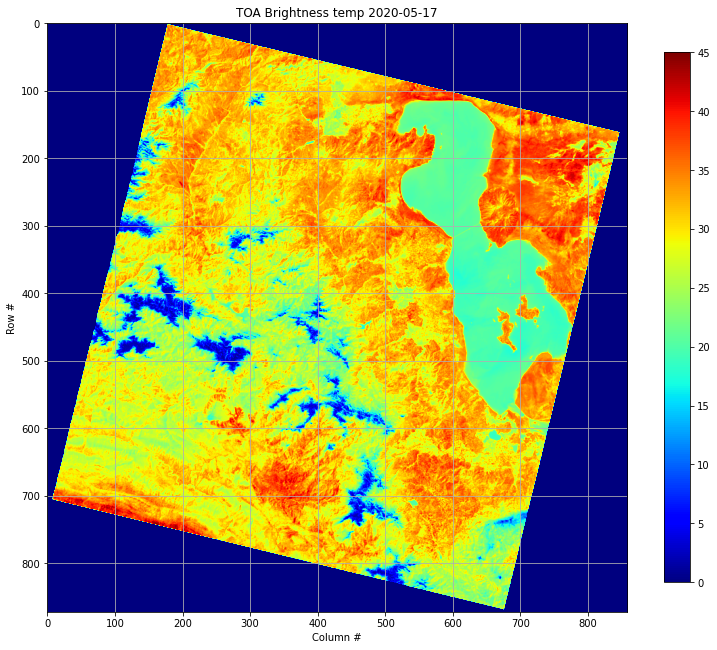

In [17]:
dn = DN_to_BrightnessTemp(image, M , A , k1, k2)
plt.imshow(dn, cmap='jet')
plt.colorbar(shrink=0.75)
plt.title('TOA Brightness temp {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
matplotlib.pyplot.grid()
plt.clim(0,45)